<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/Single_Qubit_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the last lecture we learned about all the possible states a qubit can be in. We also represented them in Bloch sphere and visualized the result.

Also in the last lecture we showed that the states are limited to the form:

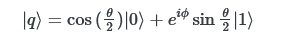

where $Θ$ and $Φ$ are real numbers. Revisit the previous tutorial [here](https://medium.com/@_monitsharma/list/introduction-to-quantum-computing-with-linear-algebra-6caba64cc007)

In this section we will cover gates, the operations that change a qubit between these states. We will only discuss single-qubit gates in this section. Brace yourself, it's going to be a big chapter.



----
An important feature of quantum circuits is that, between initializing the qubits and measuring them, the operations (gates) are always reversible! These reversible gates can be represented as matrices, and as rotations around the Bloch sphere.

Let's get started:

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.primitives import Sampler,Estimator

sampler = Sampler()

## Pauli Gates

Pauli Gates are fundamental quantum logic gates that operate on qubits, the basic units of information in quantum computing. These gates are named after Wolfgang Pauli, a renowned physicist who made significant contributions to the field of quantum mechanics.

### Background on Quantum Gates:
Before we delve into Pauli Gates, let's quickly recap what quantum gates are. Quantum gates are the analog of classical logic gates in quantum computing. They are mathematical operators that act on qubits, manipulating their quantum states to perform specific computational tasks. These gates allow us to perform operations such as superposition, entanglement, and quantum information processing.


We will see here that Pauli Matrixes can represent some very commonly used quantum gates.

### The X-Gate

The X-gate is represented by the Pauli-X matrix, which is:

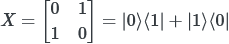




To see the effect this gate has on qubit, we simply multiply the qubit's statevector by the gate.
**We can see that the X-gate switches the amplitudes of the state $|0\rangle$ and $|1\rangle$



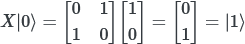


Remember that the states $|0\rangle$ and $|1\rangle$ can be represented as $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$?
We want in this exercise is a way of putting a matrix $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ in the circuit and getting back the matrix $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

From a purely mathematical perspective what we want is another matrix $X$ which when multilied by $|0\rangle$ gives as a result $|1\rangle$.
Or in other words $|1\rangle = X |0⟩$. Which matrix is that?

The answer is $X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.

From a quantum circuit persepective, a matrix that operates in a qubit and modifies it is called a gate. The $X$ matrix depicted here represent the $NOT$ gate

In [2]:
import numpy as np
v0 = np.array([[1],[0]]);v0  # make a |0> state vector

array([[1],
       [0]])

In [3]:
v1 = np.array([[0],[1]]); v1  # make a |1> state vector

array([[0],
       [1]])

In [4]:
X = np.array([[0,1],[1,0]]); X  # make the X gate matrix

array([[0, 1],
       [1, 0]])

In [5]:
X.dot(v0)              # multiply and see the resulting state

array([[0],
       [1]])

In [6]:
X.dot(v1)

array([[1],
       [0]])

We can see applying $|0⟩$ with X matrix results in $|1⟩$ state and vice-versa

**Let's see the same using Quantum Circuits:**

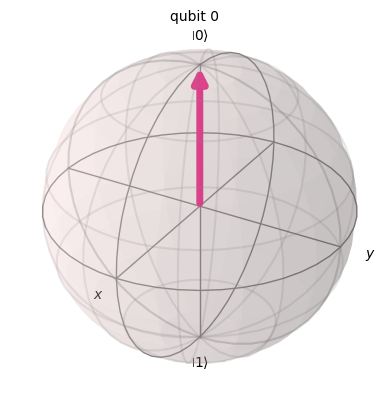

In [7]:
# let's do an X-gate on a |0> qubit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(1)


# let's visualize the state vector now

# get the statevcector
state = Statevector.from_instruction(qc)

plot_bloch_multivector(state)

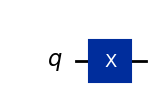

In [8]:
# let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)                 # apply the X gate
qc.draw('mpl')

Let's see the result again:

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


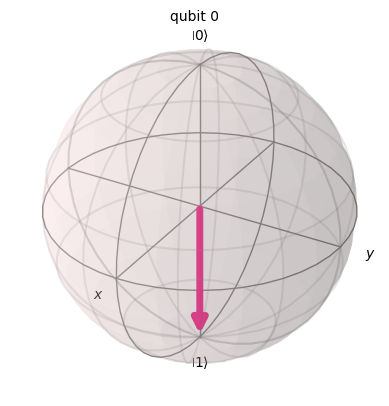

In [9]:
# Let's see the result

# get the statevcector
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

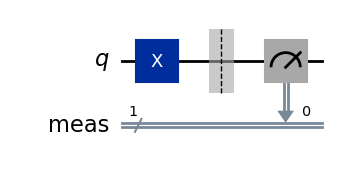

In [10]:
qc.measure_all()
qc.draw('mpl')

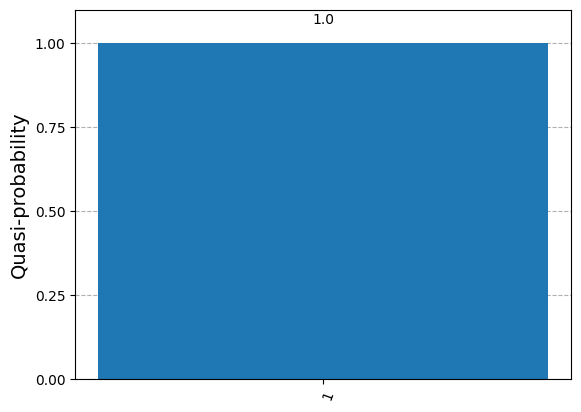

In [11]:
result = sampler.run(qc).result()   
counts = result.quasi_dists[0]
plot_histogram(counts)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the x-axis of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

### The Y and Z-gates

Similar to the $X$ gatem the $Y$ and $Z$ gates are also Pauli Matrices.


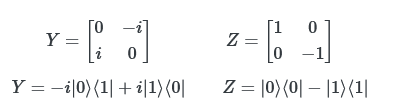

The also perform rotations by $\pi$ around the $y$ and $z$-axis of the Bloch Sphere. Let's see this:

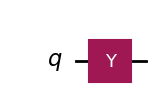

In [12]:
# let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.y(0)                 # apply the X gate
qc.draw('mpl')

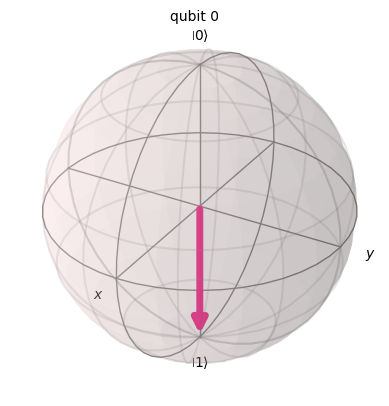

In [13]:
# Let's see the result
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

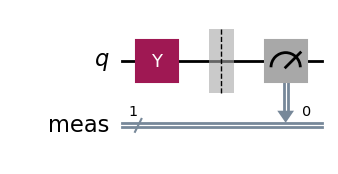

In [14]:
qc.measure_all()
qc.draw('mpl')

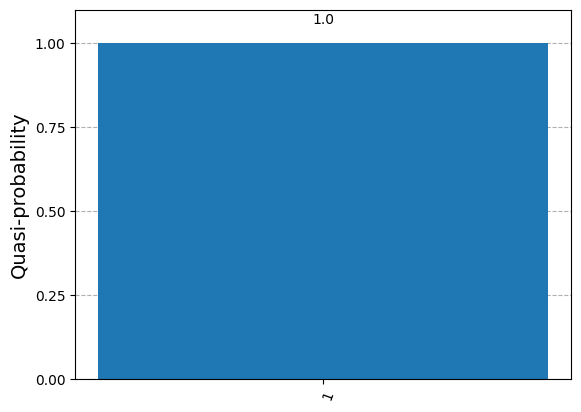

In [15]:
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)

In Qiskit we can apply the Pauli Gates, using the below syntax

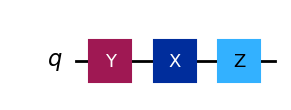

In [16]:
# let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)


qc.y(0)
qc.x(0)
qc.z(0)                 # apply the X gate
qc.draw('mpl')

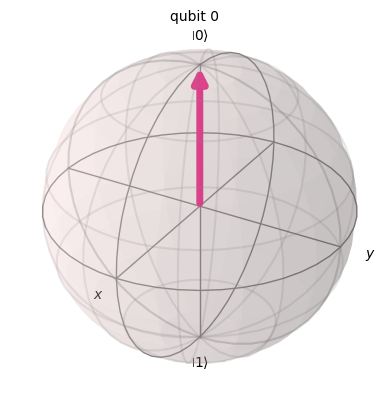

In [17]:
# Let's see the result
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

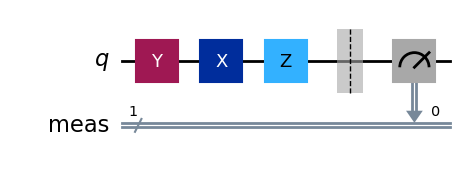

In [18]:
qc.measure_all()
qc.draw('mpl')

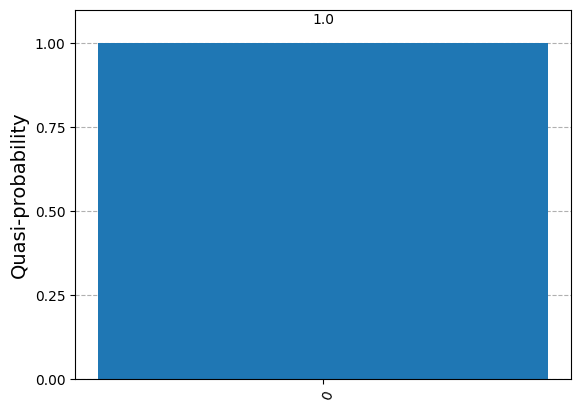

In [19]:
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)

### Identity Matrix

The fourt Pauli Matrix is the I matrix or the Identity matrix. It does nothing to the qubit.

Note that the $X$ operator if applied twice in a qubit will reverse the result again. From a matrix perspective, it means $X⋅X⋅|0⟩ = |0⟩$ or $X^2 ⋅ |0⟩ = |0⟩$. In other words $X^2 = I$ where $I$ is called Idenity Matrix

Let us see this from Linear Algebra point of view:

In [20]:
import numpy as np
# Notice that we are creating the v0 matrix using the transpose operation
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [21]:
# Here it is created again de X matrix
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [22]:
# Multiplying v0 by the X matrix twice you get again v0
X.dot(X).dot(v0)

array([[1],
       [0]])

In [23]:
# Multiplying the X matrix by itself you get the Identity matrix
X.dot(X)

array([[1, 0],
       [0, 1]])

This is our Identity Matrix.

Let's see the same from quantum circuit point of view:

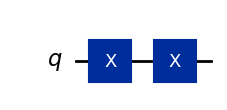

In [24]:
# let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)


qc.x(0)
qc.x(0)
                # apply the X gate
qc.draw('mpl')

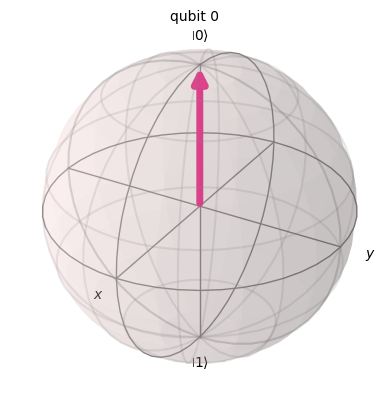

In [25]:
# Let's see the result
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

As you can see the state remains in the $|0⟩$ state, so Identity operator keeps the state unchanged and we can also infer from this that the quantum gates are invertible. Hence $X$ is it's own inverse. That's why adding another $X$ gate cancelled the effect of the previous $X$

### The X, Y & Z-Bases

To understand this section completely, you must know what  are eigenvectors of a matrix.

Multiplying a vector by a matrix results in a vector:

$$ M |v⟩ = |v'⟩$$

if we chose the right vectors and matrices, we can find a case in which this matrix multiplication is the same as doing a multiplication by scalar:

$$ M|v\rangle = \lambda |v⟩$$



For any matrix $M$ , any vector $|v⟩$ that has this property is called an eigenvector of $M$. For example, the eigenvectotrs of the $Z$ matrix are the states $|0⟩$ and $|1⟩$

$$ Z|0⟩ = |0⟩$$
$$ Z|1⟩ = -|1⟩$$

You might have notices that the $Z-$ gate appears to have no effect on the qubit, this is the reason why. Both our $|0⟩$ and $|1⟩$ are the *eigenstates* of the $Z-$ gate. That's why they are also popularly called the $Z-$ basis. We also use another basis, known as the $X$ basis, formed by the eigenstates of the $X$ gates. We call these vectors $|+⟩$ and $|-⟩$


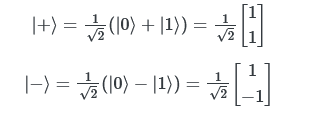


### The Hadamard Gate

The Hadamard gate is a fundamemntal quantum gate, It allows us to create a *superpositon*. It has the matrix:

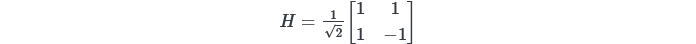

and these perform the following transformations

$$ H|0⟩ =  |+⟩$$

$$ H|1⟩ = |-⟩$$

Let's see this in action:

Remember that a qubit, when you're not looking at it, is like a coin that is still spinning. The state that this qubit it can be represented by $|\psi⟩ = a |0⟩ + b |1⟩$, with $|a|^2 + |b|^2 = 1 $, where $a$ and $b$ are the probabilities of measuring the associated base states $|0⟩$ and $|1⟩$ respectively. Since $a^2 = \frac{1}{2}$ the probability of measuring $|0⟩$ is $50\%$ and same for $|1⟩$. Therefore in this example, if we execute $10$ measurements, we expect to see approximately $5$ measures in $|0\rangle$ and $5$ measures in $|1⟩$ base state respectively. The circuit below depicts this experiment.

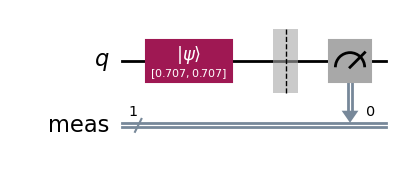

In [26]:
qc = QuantumCircuit(1)
qc.initialize([2**-0.5,2**-0.5],0)
qc.measure_all()
qc.draw('mpl')

Let's measure it:

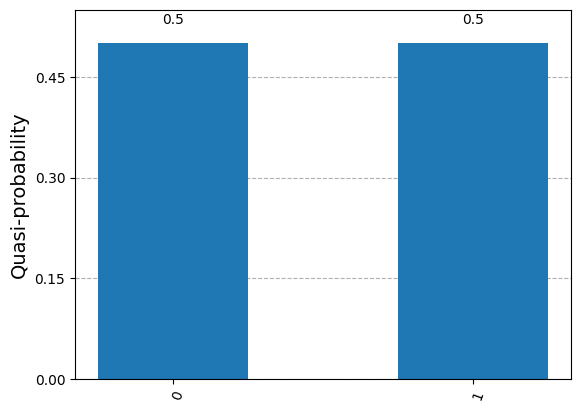

In [27]:

result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)



Near equal probability of measuring 0 and 1


The process of initializing the qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$ could also have been accomplished using Hadamard gate. This gate would recieve a qubit in state $|0\rangle$ and output the state $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$.

That gate would be hadamard gate. Call it $H$, where $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$. If we calculate:
$ H⋅ |0⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} ⋅\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}  = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$

Let's do this first in `numpy`|

In [28]:
import numpy as np
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [29]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2); H

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [30]:
H.dot(v0)

array([[0.70710678],
       [0.70710678]])

Let's do this with Quantum Circuit

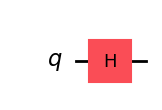

In [31]:
qc = QuantumCircuit(1)
qc.h(0)

qc.draw('mpl')

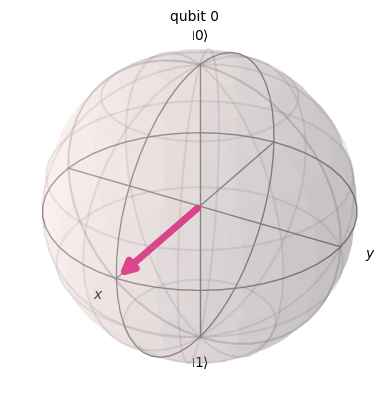

In [32]:
# Let's see the result
state = Statevector.from_instruction(qc)

plot_bloch_multivector(state)

You can see that the qubit is now in between of 0 and 1 state. Hence a superposition of both states.

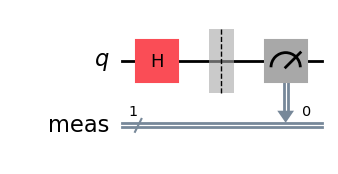

In [33]:
qc.measure_all()
qc.draw('mpl')




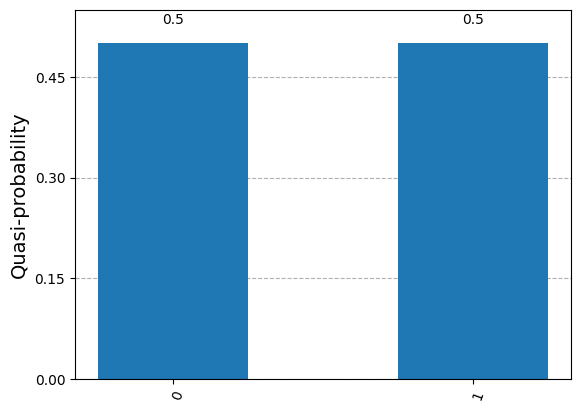

In [34]:
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)

### Measuring in Different Bases

There are infinitely many different bases that one can use to work with. As an example, let's try measuring in the $X$ basis, we calculate the probability of measuring either $|+⟩$ or $|-⟩$

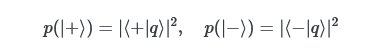


After the measurement, the superposition is destroyed. Since Qiskit only allows measurement in the $Z$ basis, we must create our own usng Hadamard gate:

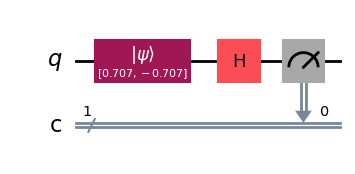

In [35]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw('mpl')

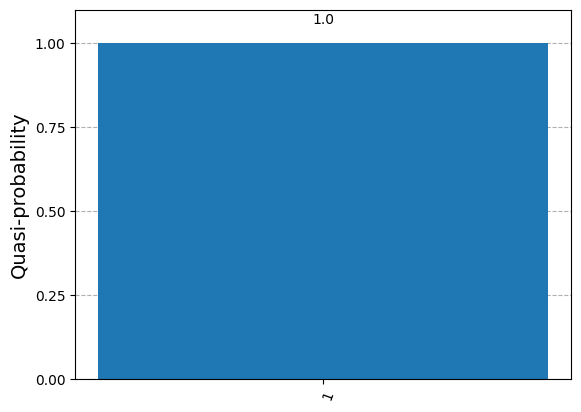

In [36]:


result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)



The result is state $|1⟩$
We saw that we created an $X$ gate by sandwiching $Z$ gate between two $H$ gates:

$$ X = HZH$$

Starting in the Z-basis, the H-gate switches our qubit to the X-basis, the Z-gate performs a NOT in the X-basis, and the final H-gate returns our qubit to the Z-basis. We can verify this always behaves like an X-gate by multiplying the matrices:

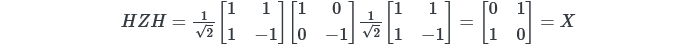


Following the same logic, we have created an X-measurement by transforming from the X-basis to the Z-basis before our measurement. Since the process of measuring can have different effects depending on the system (e.g. some systems always return the qubit to $|0⟩$ after measurement, whereas others may leave it as the measured state), the state of the qubit post-measurement is undefined and we must reset it if we want to use it again.

Let's see this again:

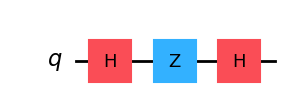

In [37]:
qc = QuantumCircuit(1)

qc.h(0)
qc.z(0)
qc.h(0)

qc.draw('mpl')

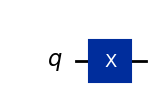

In [38]:
qc1 = QuantumCircuit(1)

qc1.x(0)


qc1.draw('mpl')

Let's plot the blochsphere for both:

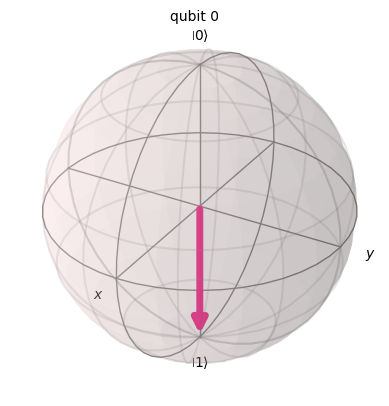

In [39]:
# Let's see the result
state = Statevector.from_instruction(qc)

plot_bloch_multivector(state)

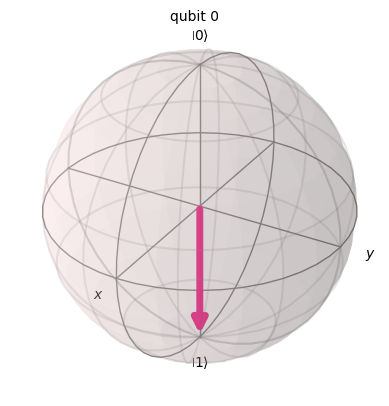

In [40]:
# Let's see the result
state = Statevector.from_instruction(qc1)
plot_bloch_multivector(state)

Hence:

$$ X = HZH $$

### The P-gate

The Phase gate is a parameterized gate, that is, it needs a number $\phi$ to tell it what to do exactly. The P gate performs a rotation of $\phi$ around the $Z$ axis direction. It has the matrix form:

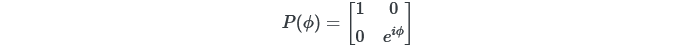

where $\phi$ is a real number.


Let's see this in action:

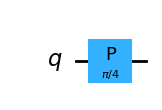

In [41]:
qc = QuantumCircuit(1)

qc.p(pi/4,0)

qc.draw('mpl')

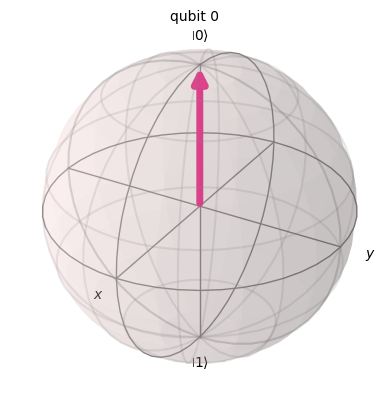

In [42]:
# Let's see the result
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

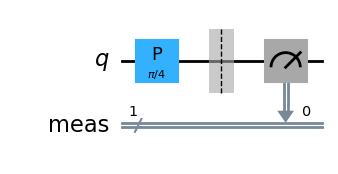

In [44]:
qc.measure_all()
qc.draw('mpl')

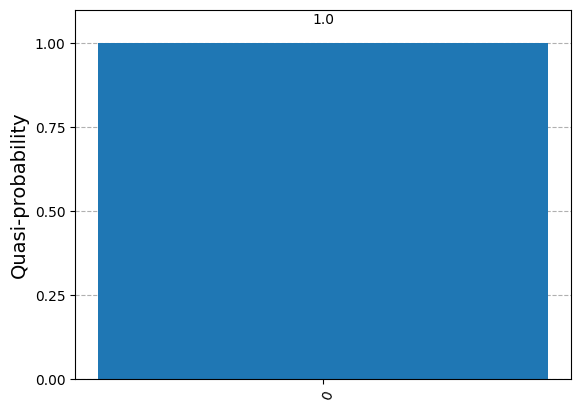

In [45]:
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)


### The I,S and T gate

#### The I gate

This is simply a gate that does nothing. Its matrix is the identity matrix:

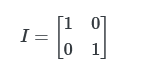


Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX$$


The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.

The eigenstates of the identity gate are simply the basis states or the computational basis states. In a qubit system, the eigenstates are |0⟩ and |1⟩, which represent the states where the qubit is in the 0 or 1 state respectively. These eigenstates remain unchanged when the identity gate is applied.



#### The S-gate

It is just the $P$ gate , but in this the value of $\phi$ is set to be $\pi/2$. It does a quarter turn around the Bloch sphere.

**It is important to note that unlike every gate introduced in this chapter so far, the S-gate is not its own inverse!**


We have a separate gate for that called the $S^{†}$ or S dagger.


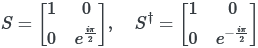

This is how you add S gate in Qiskit:

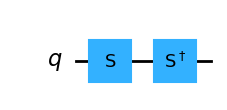

In [46]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw('mpl')

#### The T-gate:

The T-gate is yet another Phase gate, but with a fixed $\phi$ value of $\pi/4$

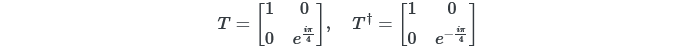

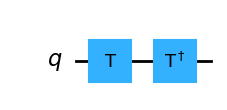

In [47]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw('mpl')

Now, the most Universal gate

### The U-gate

U-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

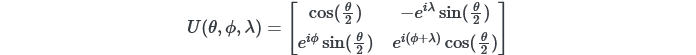



As an example, we see some specific cases of the U-gate in which it is equivalent to the H-gate and P-gate respectively.


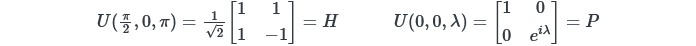

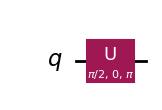

In [48]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw('mpl')

Let's see what it does?

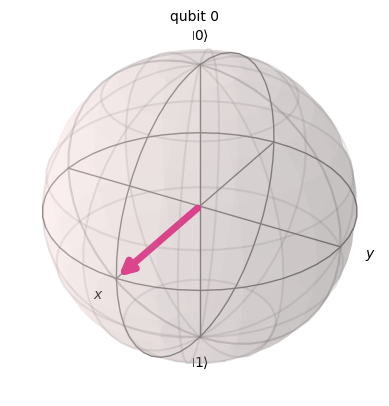

In [49]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## Standard Rotations

The standard rotation gates are those that define rotations around the Paulis
$P = \{X,Y,Z\}$. They are defined as

$$R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$



### RX gate:

This represents rotation around X axis

$$\begin{split}R_x(\theta) =
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u(\theta, -\pi/2,\pi/2)\end{split}$$

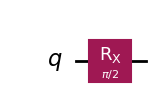

In [50]:
qc = QuantumCircuit(1)
qc.rx(pi/2,0)
qc.draw('mpl')

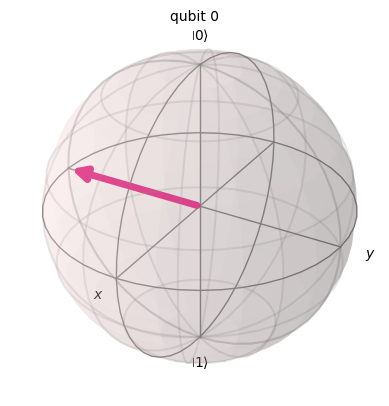

In [51]:
# Let's see the result
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

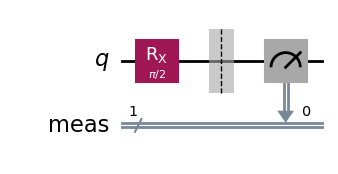

In [53]:
qc.measure_all()
qc.draw('mpl')

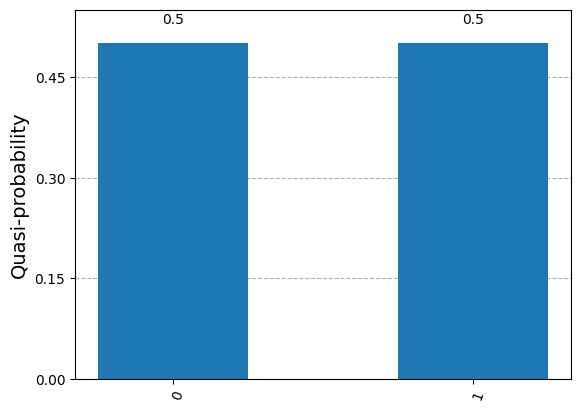

In [54]:
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)



### RY gate

This shows rotation around Y axis


$$\begin{split}R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u(\theta,0,0)\end{split}$$

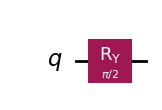

In [55]:
qc = QuantumCircuit(1)
qc.ry(pi/2,0)
qc.draw('mpl')

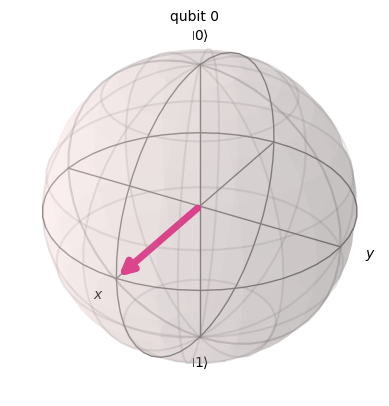

In [56]:
# Let's see the result
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

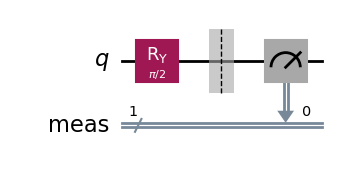

In [57]:
qc.measure_all()
qc.draw('mpl')

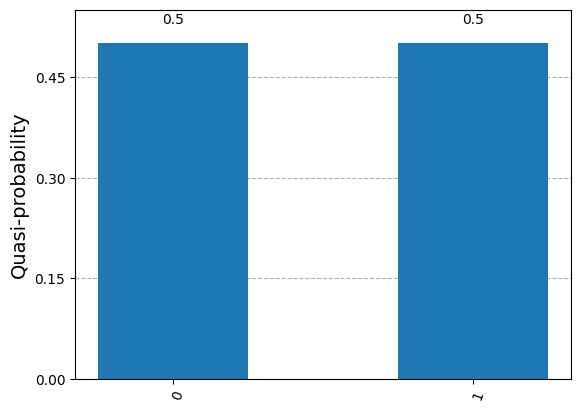

In [58]:
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)



### RZ gate

Rotation around Z axis


$$ \begin{split}R_z(\phi) =
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv p(\phi)\end{split}$$



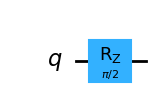

In [59]:
qc = QuantumCircuit(1)
qc.rz(pi/2,0)
qc.draw('mpl')

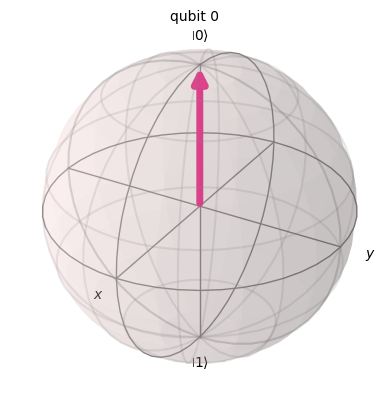

In [60]:
# Let's see the result
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

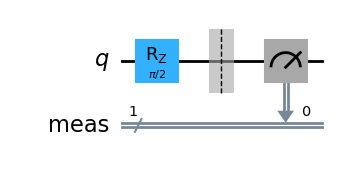

In [61]:
qc.measure_all()
qc.draw('mpl')

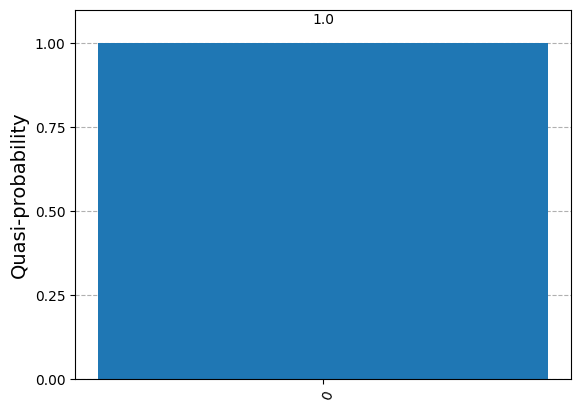

In [62]:
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)


You can check the community created cheat sheet with some of the common quantum gates, and their properties [here](https://raw.githubusercontent.com/qiskit-community/qiskit-textbook/main/content/ch-states/supplements/single-gates-cheatsheet.pdf)




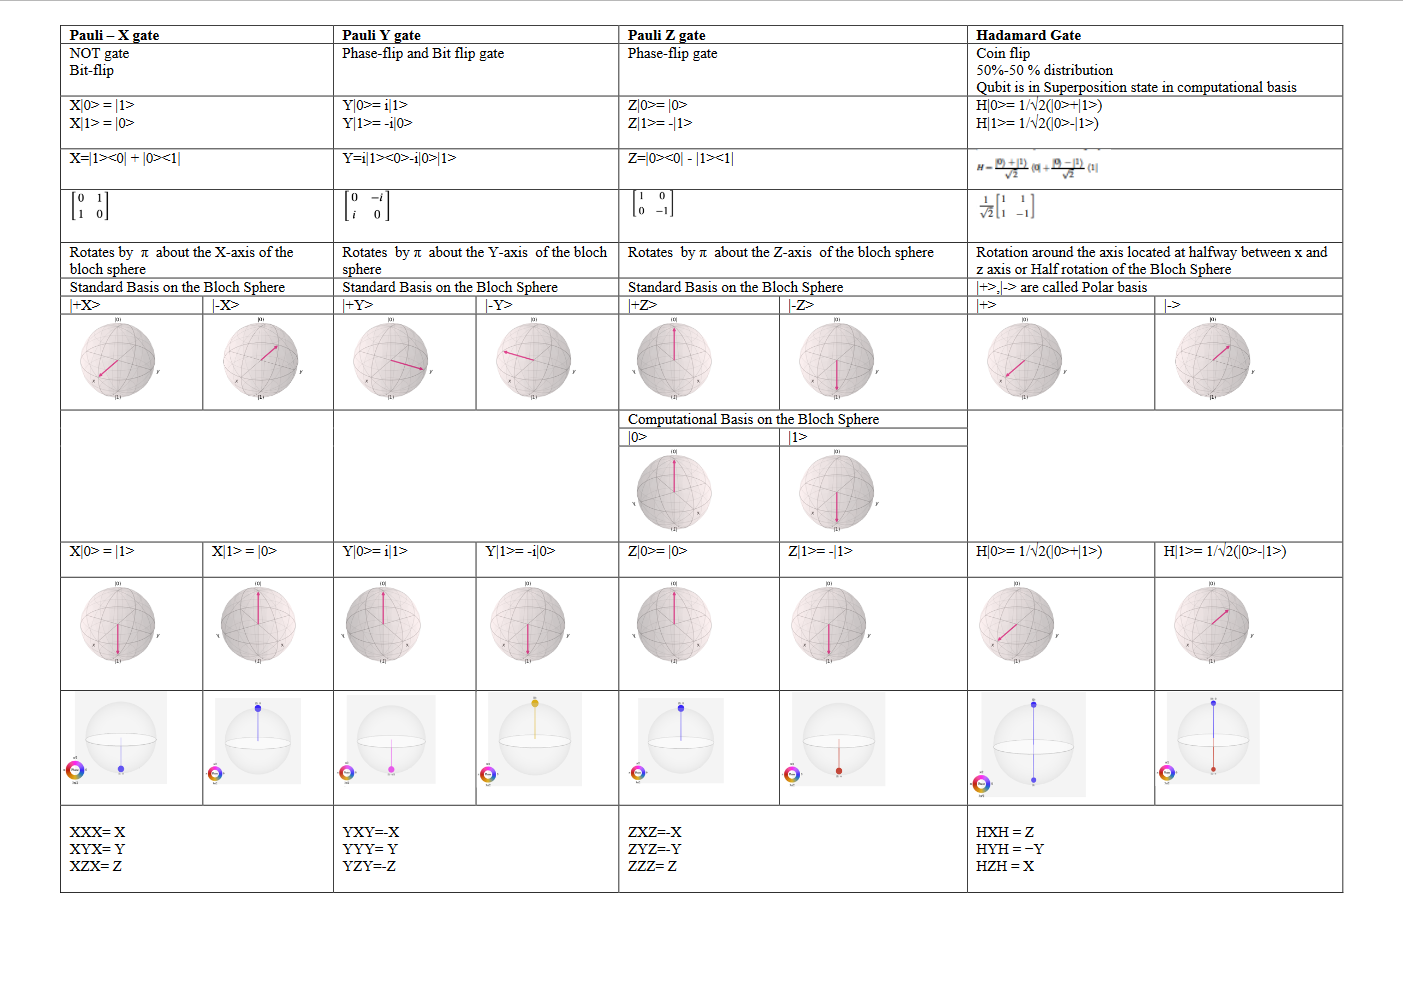